In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline
import plotly.express as px

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Variable Descriptions

1. age: age in years
2. sex: sex (1 = male; 0 = female) 
3. cp: chest pain type - Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic 
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
5. chol: serum cholestoral in mg/dl 
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. restecg: resting electrocardiographic results- Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. thalach: maximum heart rate achieved 
9. exang: exercise induced angina (1 = yes; 0 = no) 
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment- Value 1: upsloping, Value 2: flat, Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. target: 0 = disease, 1 = no disease

## Variable Types

1. Continuous - age, trestbps, chol, thalach, oldpeak
2. Binary - sex, fbs, exang, target
3. Categorical - cp, restecg, slope, ca, thal

In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Check for errors in data values

In [7]:
df.thal.value_counts()
#3 = normal; 6 = fixed defect; 7 = reversable defect

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [8]:
# Replace 0 with NaN
df.loc[df['thal']==0, 'thal'] = np.NaN

In [9]:
df.thal.unique()

array([ 1.,  2.,  3., nan])

In [10]:
df.ca.value_counts()
# number of major vessels (0-3) colored by flourosopy

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [11]:
# Replace 4 with NaN
df.loc[df['ca']==4, 'ca'] = np.NaN

In [12]:
df['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

# Replace NaN's

In [13]:
# Replace NaN with median values
df=df.fillna(df.median())

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1


# Outliers

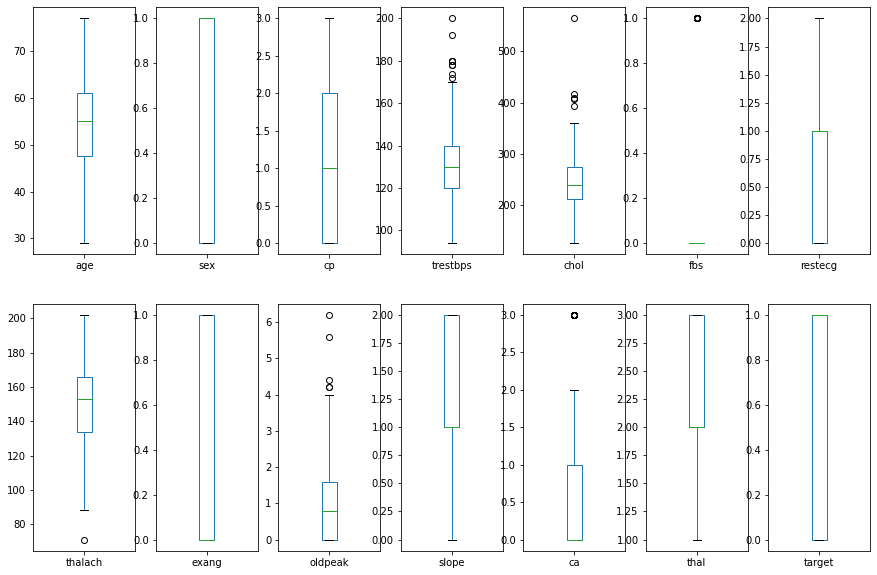

In [25]:
# Check for outliers
df.plot(kind='box',subplots=True, sharex=False, 
        sharey=False,layout=(2, 7), figsize=(15,10));
       

In [32]:
df.chol.describe()

count    303.000000
mean     245.194719
std       48.488324
min      126.000000
25%      211.000000
50%      240.000000
75%      274.000000
max      417.000000
Name: chol, dtype: float64

In [31]:
chol_median=240
df.loc[df['chol']==564, 'chol'] = 240

In [34]:
df.trestbps.describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [57]:
y=df.target.value_counts()
x=['Disease','No Disease']

fig=go.Figure(
    data=[go.Bar(x=x,y=y,text=y, textposition='auto',)],
                    layout=go.Layout(title=go.layout.Title(text='Target Variable Distribution')))

fig.show()
